# Geração de Dados

In [1]:
# Célula 1: Importações e Configurações Globais

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [2]:
# Célula 2: Carregamento e Vetorização dos Dados (Executado apenas uma vez)

# Dimensões para redimensionar as imagens
x = 20
y = 20

# Padrões de nome de arquivo
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']

Nind = 15  # Quantidade de indivíduos (classes)
Nexp = len(part3)  # Quantidade de expressões

X_list = []  # Lista para acumular imagens vetorizadas
Y_list = []  # Lista para acumular rótulos

print("Iniciando o carregamento e processamento das imagens...")
if not os.path.exists('images'):
    print("AVISO: A pasta 'images' não foi encontrada. O código não poderá carregar os dados.")
else:
    for i in range(1, Nind + 1):
        print(f"Processando indivíduo={i}")
        for j in range(Nexp):
            if i < 10:
                nome_base = f"{part1}{i}{part3[j]}"
            else:
                nome_base = f"{part2}{i}{part3[j]}"

            file_path = None
            for ext in ['.gif', '.pgm', '.jpg', '.png', '.jpeg', '']:
                potential_path = os.path.join('images', nome_base + ext)
                if os.path.exists(potential_path):
                    file_path = potential_path
                    break

            if not file_path:
                print(f"  Aviso: Imagem '{nome_base}' não encontrada. Pulando.")
                continue

            try:
                Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if Img is None:
                    print(f"  Aviso: Não foi possível ler a imagem '{file_path}'. Pulando.")
                    continue

                Ar = cv2.resize(Img, (x, y))
                a = Ar.flatten('F')  # Vetoriza a imagem
                ROT = i  # Rótulo do indivíduo

                X_list.append(a)
                Y_list.append(ROT)
            except Exception as e:
                print(f"  Erro ao processar o arquivo {file_path}: {e}")

if not X_list:
    print("\nNenhuma imagem foi carregada. Verifique o conteúdo da pasta 'images'.")
else:
    # Converte as listas para arrays NumPy
    # X_raw: cada coluna é uma imagem, cada linha é um pixel (característica)
    X_raw = np.array(X_list).T
    Y = np.array(Y_list)
    print("\nCarregamento concluído com sucesso!")
    print(f"Dimensão da matriz de dados brutos (X_raw): {X_raw.shape}")
    print(f"Dimensão do vetor de rótulos (Y): {Y.shape}")

Iniciando o carregamento e processamento das imagens...
Processando indivíduo=1
Processando indivíduo=2
Processando indivíduo=3
Processando indivíduo=4
Processando indivíduo=5
Processando indivíduo=6
Processando indivíduo=7
Processando indivíduo=8
Processando indivíduo=9
Processando indivíduo=10
Processando indivíduo=11
Processando indivíduo=12
Processando indivíduo=13
Processando indivíduo=14
Processando indivíduo=15

Carregamento concluído com sucesso!
Dimensão da matriz de dados brutos (X_raw): (400, 165)
Dimensão do vetor de rótulos (Y): (165,)


### Atividade 1: Matriz 20x20 com Dados Brutos

In [3]:
# Célula 3: Salva a matriz de dados brutos (sem normalização)

if 'X_raw' in locals():
    Z = np.vstack([X_raw, Y]).T
    np.savetxt('recfaces400.dat', Z, fmt='%f')
    print("Processo concluído. Arquivo 'recfaces400.dat' salvo com os dados brutos.")
else:
    print("A matriz de dados 'X_raw' não foi carregada. Execute a célula de carregamento primeiro.")

Processo concluído. Arquivo 'recfaces400.dat' salvo com os dados brutos.


### Atividade 1: Matriz 20x20 com Normalização [0, 1]

In [4]:
# Célula 4: Aplica normalização Min-Max [0, 1] e salva

if 'X_raw' in locals():
    print("Normalizando os atributos para o intervalo [0, 1]...")
    min_vals = np.min(X_raw, axis=1, keepdims=True)
    max_vals = np.max(X_raw, axis=1, keepdims=True)
    range_vals = max_vals - min_vals
    
    # Adiciona um pequeno epsilon para evitar divisão por zero se uma característica for constante
    X_normalized_minmax = (X_raw - min_vals) / (range_vals + 1e-9)
    
    Z = np.vstack([X_normalized_minmax, Y]).T
    np.savetxt('recfaces400[0,1].dat', Z, fmt='%f')
    print("Normalização concluída. Arquivo 'recfaces400[0,1].dat' salvo.")
else:
    print("A matriz de dados 'X_raw' não foi carregada. Execute a célula de carregamento primeiro.")

Normalizando os atributos para o intervalo [0, 1]...
Normalização concluída. Arquivo 'recfaces400[0,1].dat' salvo.


### Atividade 1: Matriz 20x20 com Normalização Z-Score

In [5]:
# Célula 5: Aplica normalização Z-score e salva

if 'X_raw' in locals():
    print("Normalizando os atributos (padrão Z-score)...")
    mean_vals = np.mean(X_raw, axis=1, keepdims=True)
    std_vals = np.std(X_raw, axis=1, keepdims=True)
    
    # Adiciona um pequeno epsilon para evitar divisão por zero
    X_normalized_zscore = (X_raw - mean_vals) / (std_vals + 1e-9)

    Z = np.vstack([X_normalized_zscore, Y]).T
    np.savetxt('recfaces400zscore.dat', Z, fmt='%f')
    print("Normalização concluída. Arquivo 'recfaces400zscore.dat' salvo.")
else:
    print("A matriz de dados 'X_raw' não foi carregada. Execute a célula de carregamento primeiro.")

Normalizando os atributos (padrão Z-score)...
Normalização concluída. Arquivo 'recfaces400zscore.dat' salvo.


### Atividade 3: PCA

In [6]:
if 'X_raw' in locals():
    print("Aplicando PCA completo (sem redução de dimensionalidade)...")
    
    pca_full = PCA()
    
    X_pca_full = pca_full.fit_transform(X_raw.T)
    
    Z = np.hstack([X_pca_full, Y.reshape(-1, 1)])
    
    print(f"Dimensão da nova matriz de dados Z (com PCA completo): {Z.shape}")
    
    # Salva no novo arquivo especificado
    np.savetxt('recfaces400PCA.dat', Z, fmt='%f')
    print("Processo concluído. Arquivo 'recfaces400PCA.dat' salvo.")
else:
    print("A matriz de dados 'X_raw' não foi carregada. Execute a célula de carregamento primeiro.")

Aplicando PCA completo (sem redução de dimensionalidade)...
Dimensão da nova matriz de dados Z (com PCA completo): (165, 166)
Processo concluído. Arquivo 'recfaces400PCA.dat' salvo.


### Atividade 5: PCA com 98% da Variância

Número de componentes para atingir 98.0% da variância: 69


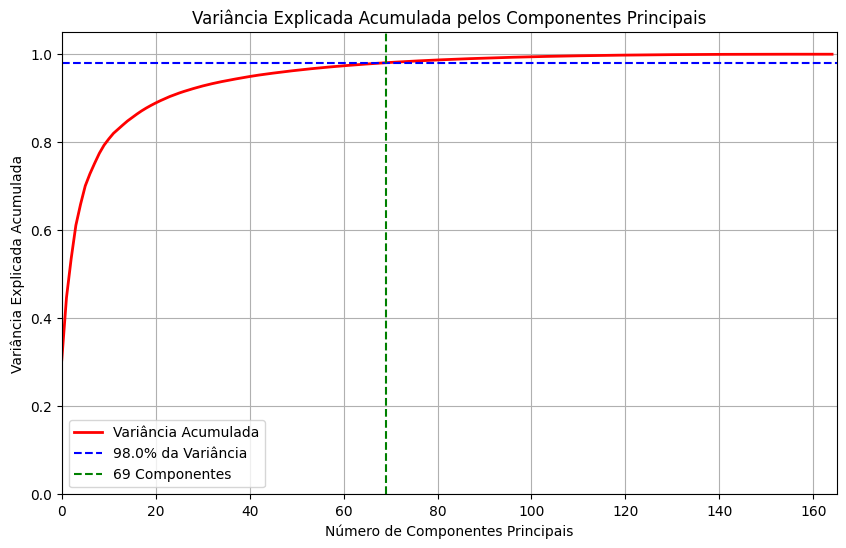

Dimensão da nova matriz de dados Z: (165, 70)
Processo concluído. Arquivo 'recfaces400PCA98var.dat' salvo.


In [7]:
# Célula 6: Aplica PCA para reter 98% da variância e salva

if 'X_raw' in locals():
    # O PCA do Scikit-learn espera amostras nas linhas, então transpomos X_raw
    pca_skl = PCA()
    pca_skl.fit(X_raw.T)

    VEq = np.cumsum(pca_skl.explained_variance_ratio_)

    target_variance = 0.98
    q = np.argmax(VEq >= target_variance) + 1
    print(f"Número de componentes para atingir {target_variance*100}% da variância: {q}")

    # Reduz a dimensionalidade usando o número de componentes 'q' encontrado
    pca_reduced = PCA(n_components=q)
    # Transforma os dados originais
    X_pca = pca_reduced.fit_transform(X_raw.T)
    
    # Plot do gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(VEq, 'r-', linewidth=2, label='Variância Acumulada')
    plt.axhline(y=target_variance, color='b', linestyle='--', label=f'{target_variance*100}% da Variância')
    plt.axvline(x=q, color='g', linestyle='--', label=f'{q} Componentes')
    plt.title('Variância Explicada Acumulada pelos Componentes Principais')
    plt.xlabel('Número de Componentes Principais')
    plt.ylabel('Variância Explicada Acumulada')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(VEq))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Prepara os dados para salvar
    Z = np.hstack([X_pca, Y.reshape(-1, 1)])
    print(f"Dimensão da nova matriz de dados Z: {Z.shape}")
    np.savetxt('recfaces400PCA98var.dat', Z, fmt='%f')
    print("Processo concluído. Arquivo 'recfaces400PCA98var.dat' salvo.")
else:
    print("A matriz de dados 'X_raw' não foi carregada. Execute a célula de carregamento primeiro.")

### Atividade 7: Transformação Box-Cox e PCA com 98% de Variância

Aplicando a transformação Box-Cox nos dados...
Transformação Box-Cox concluída.
Número de componentes para atingir 98.0% da variância (após Box-Cox): 63


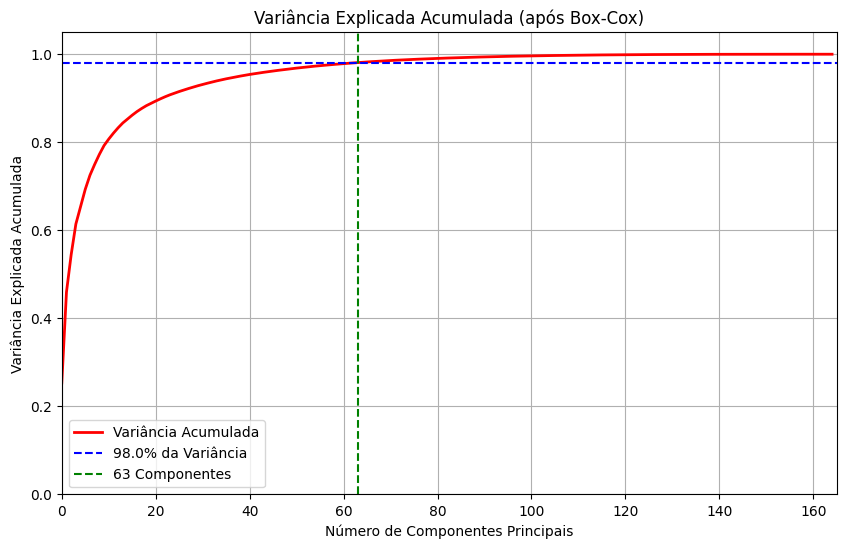

Dados processados e salvos em 'recfaces400PCA98var_boxcox.dat'.


In [8]:
# Célula 7: Aplica normalização, transformação Box-Cox, PCA e salva

if 'X_raw' in locals():
    # Normalização para o intervalo [0, 1]
    X_norm_01 = X_raw / 255.0

    print("Aplicando a transformação Box-Cox nos dados...")
    # Box-Cox requer dados estritamente positivos. Adicionamos uma pequena constante.
    offset = 1e-6
    X_positive = X_norm_01 + offset

    # Aplicamos a transformação para cada característica (pixel) individualmente
    X_boxcox = np.zeros_like(X_positive, dtype=np.float64)
    for i in range(X_positive.shape[0]):
        X_boxcox[i, :], _ = boxcox(X_positive[i, :])
    print("Transformação Box-Cox concluída.")

    # Aplicação de PCA nos dados transformados
    pca_skl_boxcox = PCA()
    pca_skl_boxcox.fit(X_boxcox.T)

    VEq_boxcox = np.cumsum(pca_skl_boxcox.explained_variance_ratio_)
    target_variance = 0.98
    q_boxcox = np.argmax(VEq_boxcox >= target_variance) + 1
    print(f"Número de componentes para atingir {target_variance*100}% da variância (após Box-Cox): {q_boxcox}")

    # Reduz a dimensionalidade
    pca_reduced_boxcox = PCA(n_components=q_boxcox)
    X_pca_boxcox = pca_reduced_boxcox.fit_transform(X_boxcox.T)

    # Plot do gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(VEq_boxcox, 'r-', linewidth=2, label='Variância Acumulada')
    plt.axhline(y=target_variance, color='b', linestyle='--', label=f'{target_variance*100}% da Variância')
    plt.axvline(x=q_boxcox, color='g', linestyle='--', label=f'{q_boxcox} Componentes')
    plt.title('Variância Explicada Acumulada (após Box-Cox)')
    plt.xlabel('Número de Componentes Principais')
    plt.ylabel('Variância Explicada Acumulada')
    plt.ylim(0, 1.05)
    plt.xlim(0, len(VEq_boxcox))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Salva os dados
    Z = np.hstack([X_pca_boxcox, Y.reshape(-1, 1)])
    output_filename = f'recfaces{x*y}PCA98var_boxcox.dat'
    np.savetxt(output_filename, Z, fmt='%f')
    print(f"Dados processados e salvos em '{output_filename}'.")
else:
    print("A matriz de dados 'X_raw' não foi carregada. Execute a célula de carregamento primeiro.")

# Atividade 8 - Processamento do Conjunto de Dados com Intruso

In [9]:
# Célula 8: Carregamento do segundo conjunto de dados (com intruso)

images_dir_intruder = 'images_with_intruder'
X_intruder_list = []
Y_intruder_list = []
person_images = {}

print(f"Iniciando o carregamento da pasta '{images_dir_intruder}'...")
if not os.path.exists(images_dir_intruder):
    print(f"AVISO: A pasta '{images_dir_intruder}' não foi encontrada.")
else:
    for filename in os.listdir(images_dir_intruder):
        file_path = os.path.join(images_dir_intruder, filename)
        if not os.path.isfile(file_path):
            continue

        Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if Img is not None:
            person_name = os.path.splitext(filename)[0].rsplit('_', 1)[0]
            if person_name not in person_images:
                person_images[person_name] = []
            person_images[person_name].append(file_path)

    sorted_person_names = sorted(person_images.keys())

    for i, person_name in enumerate(sorted_person_names):
        label = i
        image_paths = person_images[person_name]
        for file_path in image_paths:
            try:
                Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if Img is None: continue

                resized_img = cv2.resize(Img, (x, y))
                vector = resized_img.flatten()
                X_intruder_list.append(vector)
                Y_intruder_list.append(label)
            except Exception as e:
                print(f"Erro ao processar {file_path}: {e}")

if not X_intruder_list:
    print("\nNenhuma imagem foi carregada da pasta de intrusos.")
else:
    X_intruder_raw = np.array(X_intruder_list)
    Y_intruder = np.array(Y_intruder_list)
    print("\nCarregamento do conjunto de dados com intruso concluído!")
    print(f"Dimensão da matriz de dados (X_intruder_raw): {X_intruder_raw.shape}")
    print(f"Dimensão do vetor de rótulos (Y_intruder): {Y_intruder.shape}")

Iniciando o carregamento da pasta 'images_with_intruder'...

Carregamento do conjunto de dados com intruso concluído!
Dimensão da matriz de dados (X_intruder_raw): (176, 400)
Dimensão do vetor de rótulos (Y_intruder): (176,)


### Atividade 8 - Modelo 1: Apenas Vetorização

In [10]:
# Célula 9: Salva os dados brutos do conjunto com intruso

if 'X_intruder_raw' in locals():
    Z = np.hstack([X_intruder_raw, Y_intruder.reshape(-1, 1)])
    np.savetxt('modelo1.dat', Z, fmt='%f')
    print("Arquivo 'modelo1.dat' (dados brutos com intruso) salvo com sucesso.")
else:
    print("Os dados com intruso não foram carregados. Execute a célula anterior.")

Arquivo 'modelo1.dat' (dados brutos com intruso) salvo com sucesso.


### Atividade 8 - Modelo 2: Normalização Z-Score e PCA

In [11]:
# Célula 10: Aplica Z-score e PCA (sem redução) no conjunto com intruso

if 'X_intruder_raw' in locals():
    print("Normalizando os atributos (padrão Z-score)...")
    mean_vals = np.mean(X_intruder_raw, axis=0)
    std_vals = np.std(X_intruder_raw, axis=0)
    std_vals[std_vals == 0] = 1e-6  # Evita divisão por zero
    X_intruder_normalized = (X_intruder_raw - mean_vals) / std_vals
    print("Normalização concluída.")

    print("Aplicando PCA (sem redução de dimensionalidade)...")
    pca_intruder = PCA()
    X_intruder_pca = pca_intruder.fit_transform(X_intruder_normalized)

    Z = np.hstack([X_intruder_pca, Y_intruder.reshape(-1, 1)])
    np.savetxt('modelo2.dat', Z, fmt='%f')
    print("Arquivo 'modelo2.dat' (dados normalizados e com PCA) salvo com sucesso.")
else:
    print("Os dados com intruso não foram carregados. Execute a célula anterior.")

Normalizando os atributos (padrão Z-score)...
Normalização concluída.
Aplicando PCA (sem redução de dimensionalidade)...
Arquivo 'modelo2.dat' (dados normalizados e com PCA) salvo com sucesso.
